In [76]:
# !pip3 install torch

In [77]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd


In [78]:
# get data
weather_data = pd.read_csv("../vedur/vedurGogn/allarStodvar.csv", delimiter=",", names=["year", "month", "average temperature"], skiprows=1)

weather_data = weather_data.dropna()

accidents_data = pd.read_csv("../accidents/formatted-accident-data.csv", delimiter=",", names=["year", "month", "amount of accidents"], skiprows=1)
accidents_data = accidents_data.dropna()

data = pd.merge(weather_data, accidents_data, on=["year", "month"])
data

,year,month,average temperature,amount of accidents
0,2009,1,0.822500,221
1,2009,2,-1.936842,216
2,2009,3,-0.768421,261
3,2009,4,3.280000,203
4,2009,5,6.495000,231
...,...,...,...,...
163,2022,8,9.600000,238
164,2022,9,8.385714,288
165,2022,10,3.771429,366
166,2022,11,4.535714,301


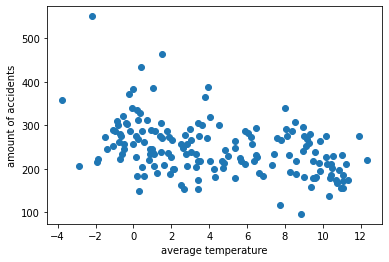

In [79]:
import matplotlib.pyplot as plt

plt.scatter(data["average temperature"], data["amount of accidents"])
plt.xlabel("average temperature")
plt.ylabel("amount of accidents")
plt.show()

In [80]:
# time = data["year"].astype(str) + "-" + data["month"].astype(str)
# time = pd.to_datetime(time).astype(int) / 10**9 # convert to unix time

# temperatures = data["average temperature"]
temperatures = data["average temperature"]
accidents = data["amount of accidents"]

X = torch.tensor(temperatures.values, dtype=torch.float32).reshape(-1, 1)
y = torch.tensor(accidents.values, dtype=torch.float32).reshape(-1, 1)


# Standardized the input features
X_mean = torch.mean(X, dim=0)
X_std = torch.std(X, dim=0)
X_standardized = (X - X_mean) / X_std

# X.size(), y.size()

In [81]:
# # Pseudo data
# years = [2018, 2018, 2019, 2019, 2020, 2020]
# months = [1, 2, 3, 4, 5, 6]
# temperatures = [23.5, 24.7, 18.2, 20.5, 22.1, 25.0]
# accidents = [10, 15, 8, 12, 11, 13]

# # Convert the lists to PyTorch tensors
# X = torch.tensor(list(zip(years, months, temperatures)), dtype=torch.float32)
# y = torch.tensor(accidents, dtype=torch.float32)

# # Standardized the input features
# X_mean = torch.mean(X, dim=0)
# X_std = torch.std(X, dim=0)
# X_standardized = (X - X_mean) / X_std



In [82]:
# Define the model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # 1 input features and 1 output

    def forward(self, x):
        return self.linear(x)

In [83]:
# Initialize the model
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)



In [84]:
# Train the model
num_epochs = 1000

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_standardized)
    loss = criterion(outputs, y)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')
        


Epoch 100/1000, Loss: 4370.5444
Epoch 200/1000, Loss: 3267.6499
Epoch 300/1000, Loss: 3248.2473
Epoch 400/1000, Loss: 3247.9058
Epoch 500/1000, Loss: 3247.8999
Epoch 600/1000, Loss: 3247.8997
Epoch 700/1000, Loss: 3247.8999
Epoch 800/1000, Loss: 3247.8999
Epoch 900/1000, Loss: 3247.8999
Epoch 1000/1000, Loss: 3247.8999


current temperature:  7.0°C
Predicted amount of accidents: 230.50
percentage from average accidents per month:  93.7 %


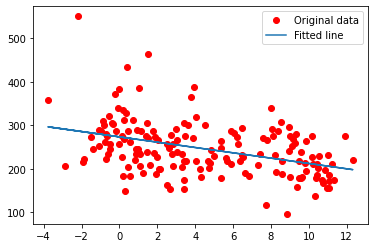

In [102]:
# inference

new_data = 7
new_data = torch.tensor(new_data, dtype=torch.float32).reshape(-1, 1)
standardized_new_data = (new_data - X_mean) / X_std
predicted = model(standardized_new_data)

# Average accidents per month: 246
# Average accidents per week: 0.339

# Print the predicted amount of accidents
print("current temperature: ", str(new_data.item()) + "°C")
print(f'Predicted amount of accidents: {predicted.item():.2f}')
print("percentage from average accidents per month: ", round(predicted.item() / 246, 3) * 100, "%")

# Plot the graph
predicted = model(X_standardized).detach().numpy()
plt.plot(X, y, 'ro', label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

